In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# task dictionary
task_dict = {
    'stroop_vanilla': 'task-td7i',
    'stroop_progressbar': 'task-lupf',
    'stroop_eyes': 'task-c9op',
    'stroop_video': 'task-1l71',
    'stroop_posneg': 'task-on6n',
    'stroop_final': 'task-7g42',
    'stroop_bonus': 'task-3kpz',
    'rdk_vanilla': 'task-2ywa',
    'rdk_progressbar': 'task-sks3',
    'rdk_eyes': 'task-zyvq',
    'rdk_video': 'task-6e3k',
    'rdk_posneg': 'task-ivrk',
    'rdk_final': 'task-sq3v',
    'rdk_bonus': 'task-hvii',
    'bandit_vanilla': 'task-dwkr',
    'bandit_progressbar': 'task-25bt',
    'bandit_eyes': 'task-x158',
    'bandit_video': 'task-9ndm',
    'bandit_posneg': 'task-tzk1',
    'bandit_final': 'task-gn7s',
    'bandit_bonus': 'task-iaas',
}

# task-separated arrays
stroop_arr = ["stroop_vanilla", "stroop_progressbar", "stroop_eyes", "stroop_video", "stroop_posneg", "stroop_final", "stroop_bonus"]
rdk_arr = ["rdk_vanilla", "rdk_progressbar", "rdk_eyes", "rdk_video", "rdk_posneg", "rdk_final", "rdk_bonus"]
bandit_arr = ["bandit_vanilla", "bandit_progressbar", "bandit_eyes", "bandit_video", "bandit_posneg", "bandit_final", "bandit_bonus"]

In [3]:
# creating stroop dataset
stroop_list = []
for manip in stroop_arr:
    stroop_df = pd.read_csv('./data_exp_124690-v4/data_exp_124690-v4_' + task_dict[manip] + '.csv')
    stroop_df.drop(stroop_df[stroop_df['Event Index'] == 'END OF FILE'].index, inplace = True)
    stroop_list.append(stroop_df)
stroop_df = pd.concat(stroop_list)

# creating rdk dataset
rdk_list = []
for manip in rdk_arr:
    rdk_df = pd.read_csv('./data_exp_124690-v4/data_exp_124690-v4_' + task_dict[manip] + '.csv')
    rdk_df.drop(rdk_df[rdk_df['Event Index'] == 'END OF FILE'].index, inplace = True)
    rdk_list.append(rdk_df)
rdk_df = pd.concat(rdk_list)

# creating bandit dataset
bandit_list = []
for manip in bandit_arr:
    bandit_df = pd.read_csv('./data_exp_124690-v4/data_exp_124690-v4_' + task_dict[manip] + '.csv')
    bandit_df.drop(bandit_df[bandit_df['Event Index'] == 'END OF FILE'].index, inplace = True)
    bandit_list.append(bandit_df)
bandit_df = pd.concat(bandit_list)

C:\Users\Devank\AppData\Local\Temp\ipykernel_2700\621924925.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  stroop_df = pd.read_csv('./data_exp_124690-v4/data_exp_124690-v4_' + task_dict[manip] + '.csv')
C:\Users\Devank\AppData\Local\Temp\ipykernel_2700\621924925.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  stroop_df = pd.read_csv('./data_exp_124690-v4/data_exp_124690-v4_' + task_dict[manip] + '.csv')
C:\Users\Devank\AppData\Local\Temp\ipykernel_2700\621924925.py:4: DtypeWarning: Columns (0,62) have mixed types. Specify dtype option on import or set low_memory=False.
  stroop_df = pd.read_csv('./data_exp_124690-v4/data_exp_124690-v4_' + task_dict[manip] + '.csv')
C:\Users\Devank\AppData\Local\Temp\ipykernel_2700\621924925.py:4: DtypeWarning: Columns (0,62) have mixed types. Specify dtype option on import or set low_memory=False.
  stroop_df = pd.read_csv('./data_ex

In [4]:
rdk_df['Tree Node Key'].value_counts()

task-ivrk    49651
task-sks3    36297
task-hvii    36181
task-zyvq    35537
task-sq3v    35186
task-2ywa    34421
task-6e3k    22265
Name: Tree Node Key, dtype: int64

In [5]:
rdk_df.columns

Index(['Event Index', 'UTC Timestamp', 'UTC Date', 'Local Timestamp',
       'Local Timezone', 'Local Date', 'Experiment ID', 'Experiment Version',
       'Tree Node Key', 'Repeat Key', 'Schedule ID', 'Participant Public ID',
       'Participant Private ID', 'Participant Starting Group',
       'Participant Status', 'Participant Completion Code',
       'Participant External Session ID', 'Participant Device Type',
       'Participant Device', 'Participant OS', 'Participant Browser',
       'Participant Monitor Size', 'Participant Viewport Size', 'Checkpoint',
       'Task Name', 'Task Version', 'randomiser-kkga', 'randomiser-adb4',
       'randomiser-qy4z', 'randomiser-96sz', 'branch-bacs', 'checkpoint-5mim',
       'checkpoint-uuzu', 'checkpoint-dtit', 'checkpoint-ly9c',
       'checkpoint-5gp5', 'checkpoint-tv5u', 'checkpoint-pmrq',
       'checkpoint-bic9', 'checkpoint-gmjm', 'checkpoint-tmgz',
       'checkpoint-46o1', 'checkpoint-jyvi', 'checkpoint-as8d',
       'checkpoint-5yxx',

### DATA CLEANUP

Due to a lot of incomplete submissions, the data will have to be cleaned up to remove these submissions and the columns that move through the analysis pipeline will also be trimmed here.

In [6]:
stroop_df = stroop_df[
    [
        'Local Date',
        'Tree Node Key',
        'Participant Public ID',
        'Participant Private ID',
        'Participant Status',
        'Checkpoint',
        'Task Name',
        'Trial Number',
        'Screen Number',
        'Screen Name',
        'Reaction Time',
        'Response Type',
        'Response',
        'Attempt',
        'Correct',
        'Incorrect',
        'Timed Out',
        'display',
        'Stimulus',
        'Answer',
        'ANSWER',
        'Left',
        'Right',
        'Up',
        'Down'
    ]
]

rdk_df = rdk_df[
    [
        'Local Date',
        'Tree Node Key',
        'Participant Public ID',
        'Participant Private ID',
        'Participant Status',
        'Checkpoint',
        'Task Name',
        'Trial Number',
        'Screen Number',
        'Screen Name',
        'Reaction Time',
        'Response Type',
        'Response',
        'Attempt',
        'Correct',
        'Incorrect',
        'Timed Out',
        'display',
        'Stimulus',
        'Answer'
    ]
]

bandit_df = bandit_df[
    [
        'Local Date',
        'Tree Node Key',
        'Participant Public ID',
        'Participant Private ID',
        'Participant Status',
        'Checkpoint',
        'Task Name',
        'Trial Number',
        'Screen Number',
        'Screen Name',
        'Reaction Time',
        'Response Type',
        'Response',
        'Attempt',
        'Correct',
        'Incorrect',
        'Timed Out',
        'display', 
        'Correct Answers',
        'Stimuli 1',
        'Stimuli 2',
        'Stimuli 3',
        'Stimuli 4',
        'ANSWER',
        'Best Choice',
    ]
]

In [7]:
def get_incomplete_ids(df, manip):
    
    incomplete_participants = []
    focus_df = df[df['Tree Node Key'] == task_dict[manip]]
    participants = focus_df['Participant Private ID'].unique().tolist()
    
    for participant in participants:
        participant_df = focus_df[focus_df['Participant Private ID'] == participant]
        
        if participant_df.empty:
            incomplete_participants.append(participant)
        elif participant_df.iloc[0]["Checkpoint"] == "consent-given":
            incomplete_participants.append(participant)
        
    return incomplete_participants

In [8]:
print("##### DROPOUTS #####\n")
total = 0

stroop_inc_ids = []
for manip in stroop_arr:
    x = get_incomplete_ids(stroop_df, manip)
    stroop_inc_ids.extend(x)
    print(manip + " = {}".format(len(x)))
total += len(stroop_inc_ids)
stroop_df = stroop_df[~stroop_df["Participant Private ID"].isin(stroop_inc_ids)]
print()

rdk_inc_ids = []
for manip in rdk_arr:
    x = get_incomplete_ids(rdk_df, manip)
    rdk_inc_ids.extend(x)
    print(manip + " = {}".format(len(x)))
total += len(rdk_inc_ids)
rdk_df = rdk_df[~rdk_df["Participant Private ID"].isin(rdk_inc_ids)]
print()

bandit_inc_ids = []
for manip in bandit_arr:
    x = get_incomplete_ids(bandit_df, manip)
    bandit_inc_ids.extend(x)
    print(manip + " = {}".format(len(x)))
total += len(bandit_inc_ids)
bandit_df = bandit_df[~bandit_df["Participant Private ID"].isin(bandit_inc_ids)]
      
print("\nTotal = {}".format(total))

##### DROPOUTS #####

stroop_vanilla = 6
stroop_progressbar = 7
stroop_eyes = 3
stroop_video = 27
stroop_posneg = 4
stroop_final = 2
stroop_bonus = 0

rdk_vanilla = 4
rdk_progressbar = 0
rdk_eyes = 3
rdk_video = 34
rdk_posneg = 6
rdk_final = 2
rdk_bonus = 2

bandit_vanilla = 2
bandit_progressbar = 3
bandit_eyes = 2
bandit_video = 34
bandit_posneg = 3
bandit_final = 1
bandit_bonus = 1

Total = 146


In [9]:
import os
os.makedirs('data', exist_ok=True)

stroop_df.to_csv('data/stroop_df.csv')
rdk_df.to_csv('data/rdk_df.csv')
bandit_df.to_csv('data/bandit_df.csv')

### GENERAL METRICS

In [10]:
def accuracy_calculator (df, arr):

    accuracies = []
    for manip in arr:

        focus_df = df[df['Tree Node Key'] == task_dict[manip]]
        participants = focus_df['Participant Private ID'].unique().tolist()
        overall_accuracy = 0.0
        if len(participants) < 1:
            accuracies.append(overall_accuracy)
            continue

        for participant in participants:
            participant_df = focus_df[focus_df['Participant Private ID'] == participant]
            participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Attempt', 'Correct', 'Incorrect']]

            # for timeouts
            participant_df['Attempt'].fillna(0, inplace = True)

            accuracy = participant_df['Correct'].sum() / len(participant_df)
            overall_accuracy += accuracy

        overall_accuracy /= len(participants)
        accuracies.append(overall_accuracy * 100)

    return accuracies

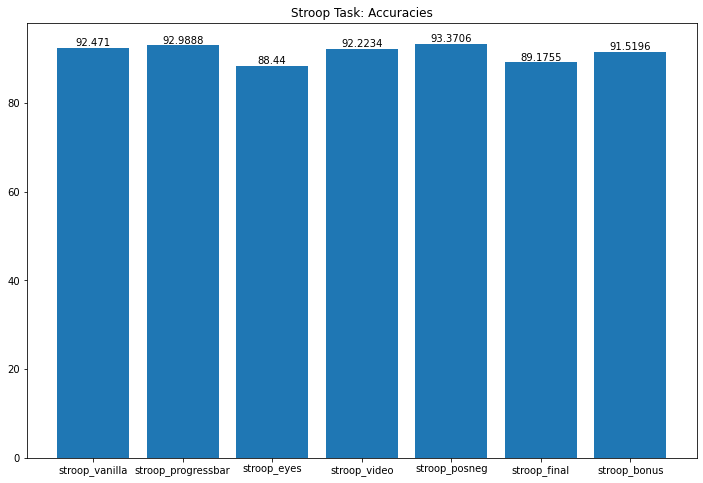

In [11]:
stroop_accuracies = accuracy_calculator(stroop_df, stroop_arr)

fig, ax = plt.subplots(figsize=(12,8))
plot = ax.bar(stroop_arr, stroop_accuracies)
ax.bar_label(plot)
ax.set_title('Stroop Task: Accuracies')
plt.show()

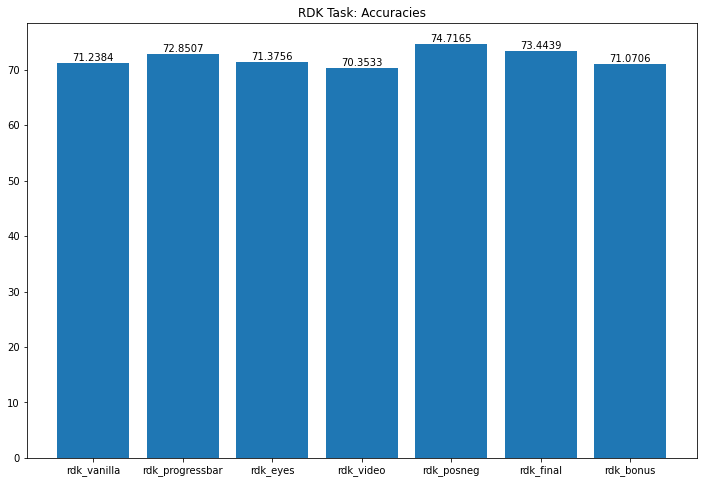

In [12]:
rdk_accuracies = accuracy_calculator(rdk_df, rdk_arr)

fig, ax = plt.subplots(figsize=(12,8))
plot = ax.bar(rdk_arr, rdk_accuracies)
ax.bar_label(plot)
ax.set_title('RDK Task: Accuracies')
plt.show()

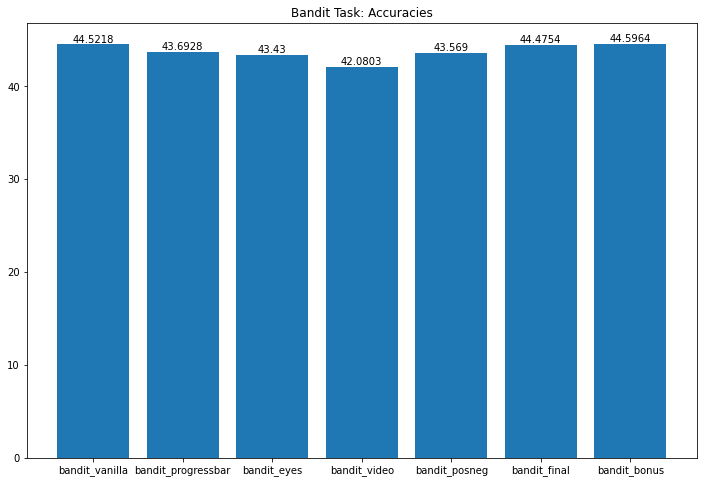

In [13]:
bandit_accuracies = accuracy_calculator(bandit_df, bandit_arr)

fig, ax = plt.subplots(figsize=(12,8))
plot = ax.bar(bandit_arr, bandit_accuracies)
ax.bar_label(plot)
ax.set_title('Bandit Task: Accuracies')
plt.show()

In [14]:
bandit_df.head()

,Tree Node Key,Participant Public ID,Participant Private ID,Participant Status,Checkpoint,Task Name,Trial Number,Screen Number,Screen Name,Reaction Time,...,Incorrect,Timed Out,display,Correct Answers,Stimuli 1,Stimuli 2,Stimuli 3,Stimuli 4,ANSWER,Best Choice
0,task-dwkr,605e2110dc2a5f57dfd288c6,8283555.0,complete,urn-vanilla,urn-task-3-vanilla,BEGIN TASK,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,task-dwkr,605e2110dc2a5f57dfd288c6,8283555.0,complete,urn-vanilla,urn-task-3-vanilla,1,1.0,Screen 1,3879.7,...,1.0,NaN,fullscreen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,task-dwkr,605e2110dc2a5f57dfd288c6,8283555.0,complete,urn-vanilla,urn-task-3-vanilla,1,2.0,Screen 2,16.622,...,1.0,1.0,fullscreen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,task-dwkr,605e2110dc2a5f57dfd288c6,8283555.0,complete,urn-vanilla,urn-task-3-vanilla,1,1.0,Screen 1,14164.3,...,1.0,NaN,instructions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,task-dwkr,605e2110dc2a5f57dfd288c6,8283555.0,complete,urn-vanilla,urn-task-3-vanilla,1,1.0,Screen 2,2854.9,...,0.0,NaN,practice,"[""left""]",bandit-1-3.png,bandit-1-2.png,bandit-1-0.png,bandit-1-1.png,NaN,bandit-1-3.png


In [15]:
def reaction_time_calculator (df, arr):

    reaction_times = []
    for manip in arr:

        focus_df = df[df['Tree Node Key'] == task_dict[manip]]
        participants = focus_df['Participant Private ID'].unique().tolist()
        overall_reaction_time = 0.0
        if len(participants) < 1:
            reaction_times.append(overall_reaction_time)
            continue

        for participant in participants:
            participant_df = focus_df[focus_df['Participant Private ID'] == participant]
            participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Reaction Time']]

            reaction_time = participant_df['Reaction Time'].astype('float').sum() / len(participant_df)
            overall_reaction_time += reaction_time

        overall_reaction_time /= len(participants)
        reaction_times.append(overall_reaction_time)

    return reaction_times

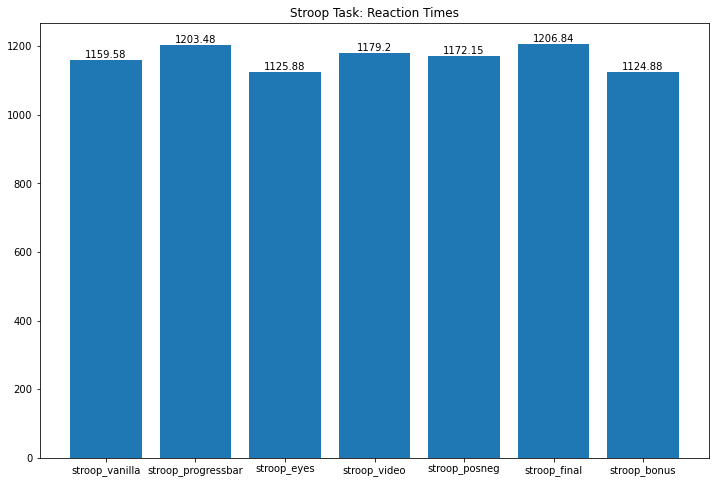

In [16]:
stroop_reaction_times = reaction_time_calculator(stroop_df, stroop_arr)

fig, ax = plt.subplots(figsize=(12,8))
plot = ax.bar(stroop_arr, stroop_reaction_times)
ax.bar_label(plot)
ax.set_title('Stroop Task: Reaction Times')
plt.show()

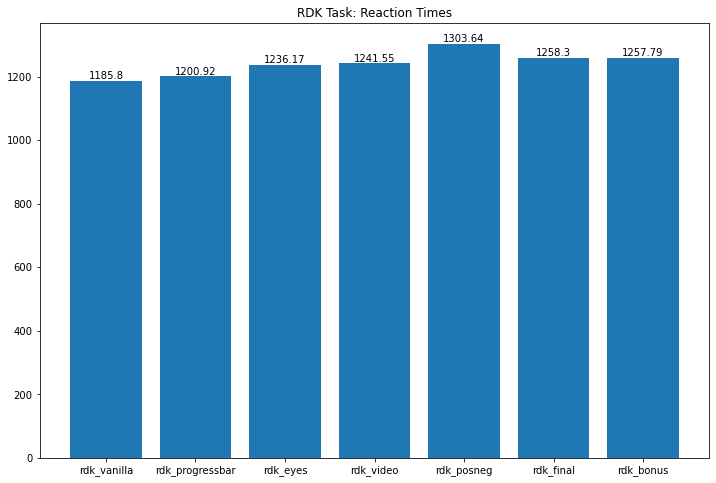

In [17]:
rdk_reaction_times = reaction_time_calculator(rdk_df, rdk_arr)

fig, ax = plt.subplots(figsize=(12,8))
plot = ax.bar(rdk_arr, rdk_reaction_times)
ax.bar_label(plot)
ax.set_title('RDK Task: Reaction Times')
plt.show()

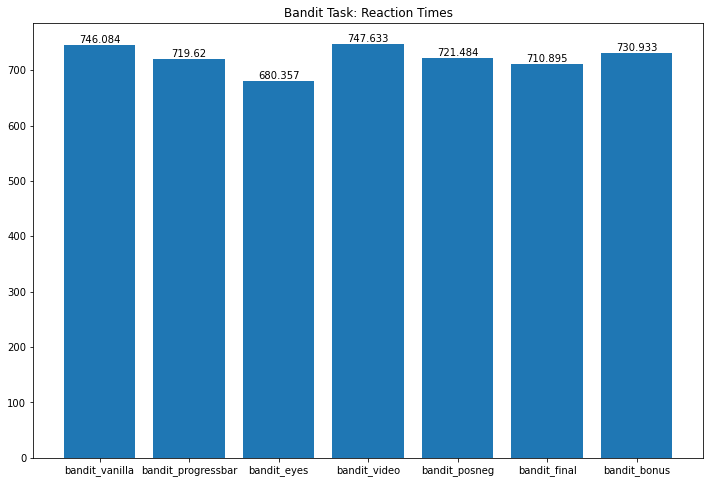

In [18]:
bandit_reaction_times = reaction_time_calculator(bandit_df, bandit_arr)

fig, ax = plt.subplots(figsize=(12,8))
plot = ax.bar(bandit_arr, bandit_reaction_times)
ax.bar_label(plot)
ax.set_title('Bandit Task: Reaction Times')
plt.show()

In [19]:
def posneg_feedback_counter (df, arr):
    
    pos_count_arr = []
    neg_count_arr = []
    manip = [m for m in arr if 'posneg' in m][0]
    focus_df = df[df['Tree Node Key'] == task_dict[manip]]
    participants = pd.unique(focus_df['Participant Private ID'])

    for participant in participants:
        participant_df = focus_df[focus_df['Participant Private ID'] == participant]
        pos_count_arr.append((participant_df['Screen Name'] == 'positive_feedback').sum())
        neg_count_arr.append((participant_df['Screen Name'] == 'negative_feedback').sum())

    return pos_count_arr, neg_count_arr

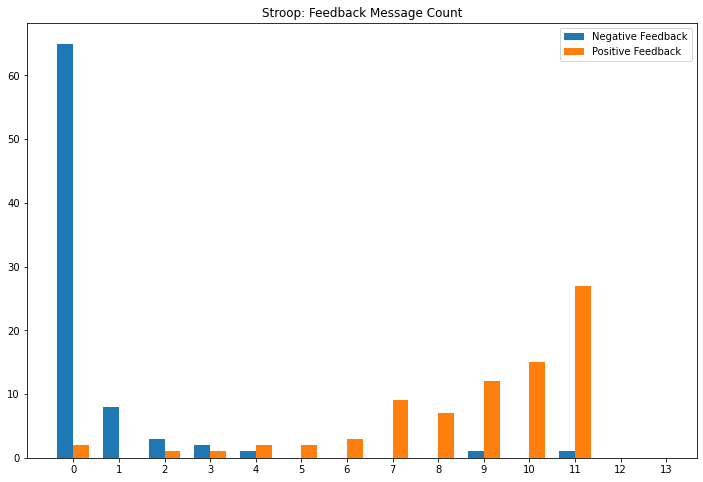

In [20]:
stroop_pos_count, stroop_neg_count = posneg_feedback_counter(stroop_df, stroop_arr)
width = 0.35

fig, ax = plt.subplots(figsize=(12,8))
lower = ax.hist(stroop_neg_count, bins=np.arange(0, 14)-0.35, label='Negative Feedback', width=width)
upper = ax.hist(stroop_pos_count, bins=np.arange(0, 14), label='Positive Feedback', width=width)
ax.set_title('Stroop: Feedback Message Count')
ax.set_xticks(np.arange(0, 14))
ax.legend()
plt.show()

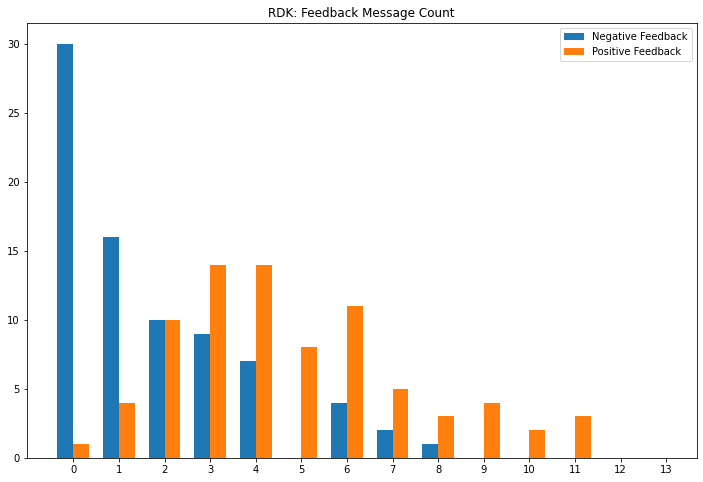

In [21]:
rdk_pos_count, rdk_neg_count = posneg_feedback_counter(rdk_df, rdk_arr)

fig, ax = plt.subplots(figsize=(12,8))
lower = ax.hist(rdk_neg_count, bins=np.arange(0, 14)-0.35, label='Negative Feedback', width=width)
upper = ax.hist(rdk_pos_count, bins=np.arange(0, 14), label='Positive Feedback', width=width)
ax.set_title('RDK: Feedback Message Count')
ax.set_xticks(np.arange(0, 14))
ax.legend()
plt.show()

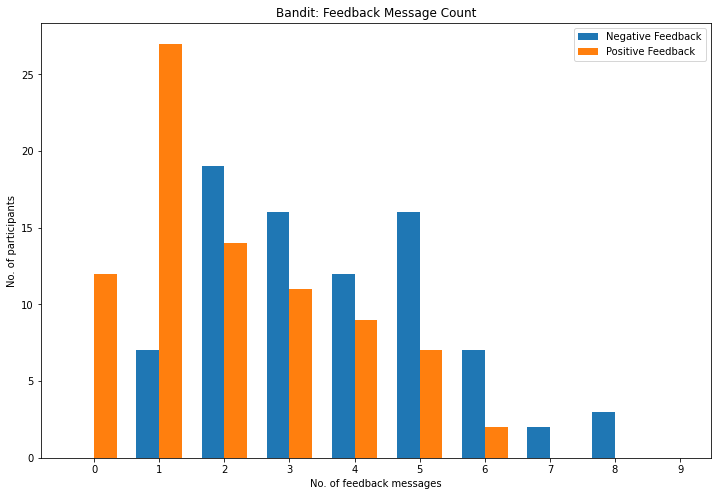

In [22]:
bandit_pos_count, bandit_neg_count = posneg_feedback_counter(bandit_df, bandit_arr)

fig, ax = plt.subplots(figsize=(12,8))
lower = ax.hist(bandit_neg_count, bins=np.arange(0, 10)-0.35, label='Negative Feedback', width=width)
upper = ax.hist(bandit_pos_count, bins=np.arange(0, 10), label='Positive Feedback', width=width)
ax.set_title('Bandit: Feedback Message Count')
ax.set_xticks(np.arange(0, 10))
ax.set_ylabel('No. of participants')
ax.set_xlabel('No. of feedback messages')
ax.legend()
plt.show()

In [23]:
def bonus_counter(df, arr):
    
    bonus = 0
    manip = [m for m in arr if 'bonus' in m][0]
    focus_df = df[df['Tree Node Key'] == task_dict[manip]]
    participants = pd.unique(focus_df['Participant Private ID'])
    
    bonus_df = focus_df[focus_df['Trial Number'] == 'bonusAwarded']
    bonus = (bonus_df['Response'] == 'true').sum()

    return bonus, participants.size

In [24]:
stroop_bonus, stroop_total = bonus_counter(stroop_df, stroop_arr)
rdk_bonus, rdk_total = bonus_counter(rdk_df, rdk_arr)
bandit_bonus, bandit_total = bonus_counter(bandit_df, bandit_arr)
print("Stroop task bonus winners: " + str(stroop_bonus) + "/" + str(stroop_total))
print("RDK task bonus winners: " + str(rdk_bonus) + "/" + str(rdk_total))
print("Bandit task bonus winners: " + str(bandit_bonus) + "/" + str(bandit_total))

Stroop task bonus winners: 43/85
RDK task bonus winners: 36/84
Bandit task bonus winners: 41/84


### I. ACCURACIES PER TASK

In [25]:
def accuracies_per_task (df, task):

    accuracies = []
    task_arr = []
    
    focus_df = df[df['Tree Node Key'] == task_dict[task]]
    participants = focus_df['Participant Private ID'].unique().tolist()

    for participant in participants:
        participant_df = focus_df[focus_df['Participant Private ID'] == participant]
        participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Attempt', 'Correct', 'Incorrect']]

        if participant_df.empty:
            participants.remove(participant)
            continue
        
        # for timeouts
        participant_df['Attempt'].fillna(0, inplace = True)

        accuracy = participant_df['Correct'].sum() / len(participant_df)
        accuracies.append(accuracy * 100)
        task_arr.append(task)

    return task_arr, accuracies

C:\Users\Devank\.conda\envs\data_literacy\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Task', ylabel='Accuracy'>

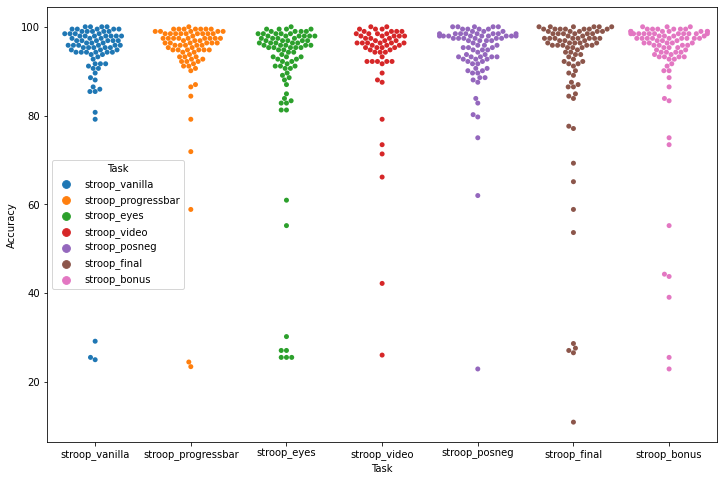

In [26]:
stroop_accuracies = []
stroop_tasks = []
for manip in stroop_arr:
    manip_arr, manip_acc = accuracies_per_task(stroop_df, manip)
    stroop_accuracies.append(manip_acc)
    stroop_tasks.append(manip_arr)
    
stroop_accuracies = [item for sublist in stroop_accuracies for item in sublist]
stroop_tasks = [item for sublist in stroop_tasks for item in sublist]
stroop_acc_df = pd.DataFrame({'Task': stroop_tasks, 'Accuracy': stroop_accuracies})
fig = plt.figure(figsize=(12,8))

# sns.boxplot(data=stroop_acc_df, x = 'Task', y='Accuracy', hue='Task')
sns.swarmplot(data=stroop_acc_df, x = 'Task', y='Accuracy', hue='Task')

<AxesSubplot:xlabel='Task', ylabel='Accuracy'>

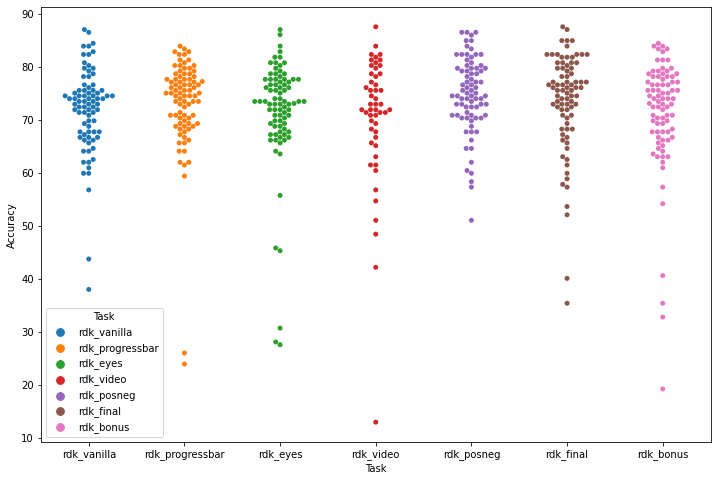

In [27]:
rdk_accuracies = []
rdk_tasks = []
for manip in rdk_arr:
    manip_arr, manip_acc = accuracies_per_task(rdk_df, manip)
    rdk_accuracies.append(manip_acc)
    rdk_tasks.append(manip_arr)
    
rdk_accuracies = [item for sublist in rdk_accuracies for item in sublist]
rdk_tasks = [item for sublist in rdk_tasks for item in sublist]
rdk_acc_df = pd.DataFrame({'Task': rdk_tasks, 'Accuracy': rdk_accuracies})
fig = plt.figure(figsize=(12,8))

# sns.violinplot(data=rdk_acc_df, x = 'Task', y='Accuracy', hue='Task')
sns.swarmplot(data=rdk_acc_df, x = 'Task', y='Accuracy', hue='Task')

<AxesSubplot:xlabel='Task', ylabel='Accuracy'>

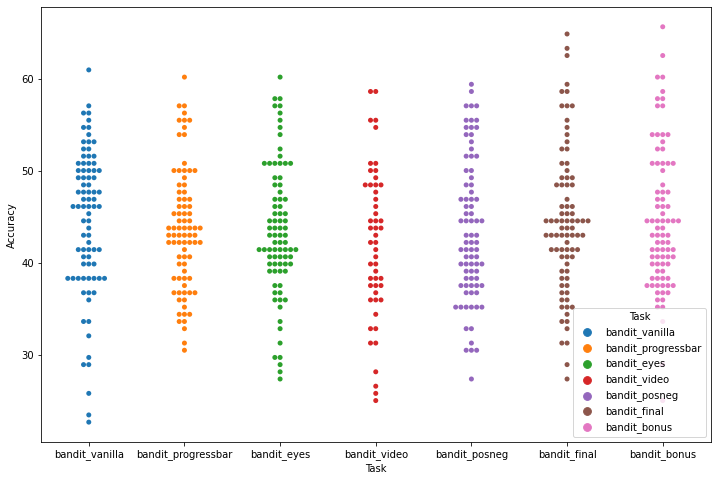

In [28]:
bandit_accuracies = []
bandit_tasks = []
for manip in bandit_arr:
    manip_arr, manip_acc = accuracies_per_task(bandit_df, manip)
    bandit_accuracies.append(manip_acc)
    bandit_tasks.append(manip_arr)
    
bandit_accuracies = [item for sublist in bandit_accuracies for item in sublist]
bandit_tasks = [item for sublist in bandit_tasks for item in sublist]
bandit_acc_df = pd.DataFrame({'Task': bandit_tasks, 'Accuracy': bandit_accuracies})
fig = plt.figure(figsize=(12,8))

# sns.boxplot(data=bandit_acc_df, x = 'Task', y='Accuracy', hue='Task')
sns.swarmplot(data=bandit_acc_df, x = 'Task', y='Accuracy', hue='Task')

### II. SCATTER PLOT - ACCURACY VS POSNEG FEEDBACK

In [29]:
def accuracy_vs_posneg(df, arr):
    
    acc_posneg_df = pd.DataFrame(columns=['Participant', 'Accuracy', 'Positive Feedback', 'Negative Feedback'])
    manip = [m for m in arr if 'posneg' in m][0]
    focus_df = df[df['Tree Node Key'] == task_dict[manip]]
    participants = pd.unique(focus_df['Participant Private ID'])
    
    for participant in participants:
        participant_df = focus_df[focus_df['Participant Private ID'] == participant]
        pos_count = (participant_df['Screen Name'] == 'positive_feedback').sum()
        neg_count = (participant_df['Screen Name'] == 'negative_feedback').sum()
        participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Attempt', 'Correct', 'Incorrect']]
        participant_df['Attempt'].fillna(0, inplace = True)
        accuracy = (participant_df['Correct'].sum() * 100) / len(participant_df)
        acc_posneg_df = acc_posneg_df.append({
            'Participant': participant, 
            'Accuracy': accuracy, 
            'Positive Feedback': pos_count, 
            'Negative Feedback': neg_count
        }, ignore_index=True)
    
    return acc_posneg_df

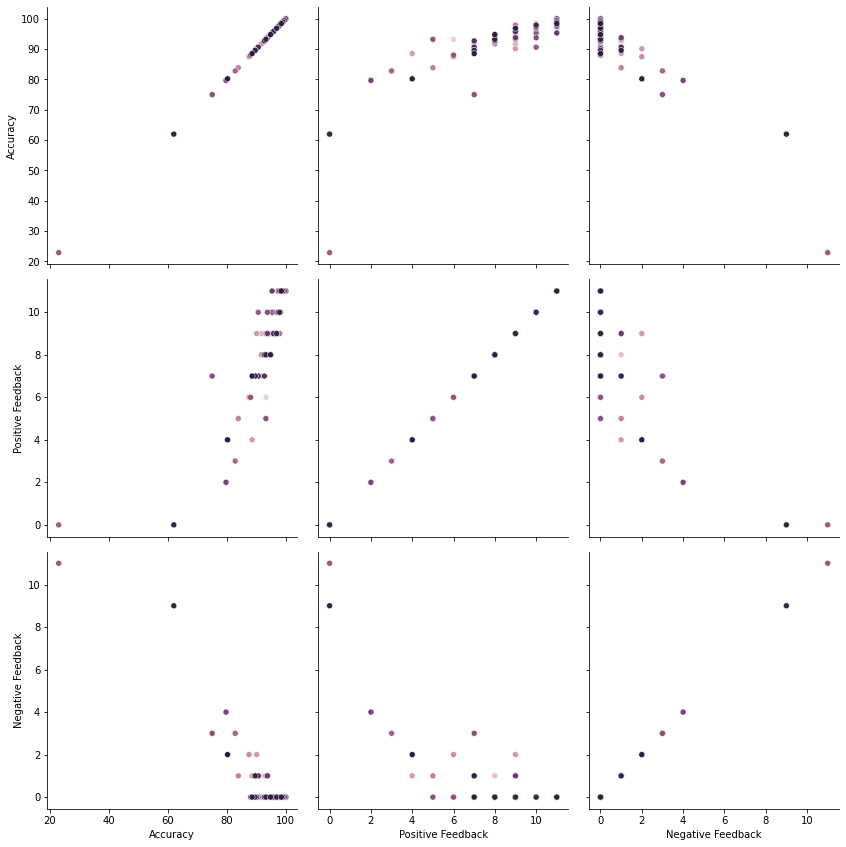

In [30]:
stroop_acc_posneg_df = accuracy_vs_posneg(stroop_df, stroop_arr)
rdk_acc_posneg_df = accuracy_vs_posneg(rdk_df, rdk_arr)
bandit_acc_posneg_df = accuracy_vs_posneg(bandit_df, bandit_arr)

g = sns.PairGrid(stroop_acc_posneg_df, hue='Participant', height=4)
g.map(sns.scatterplot)

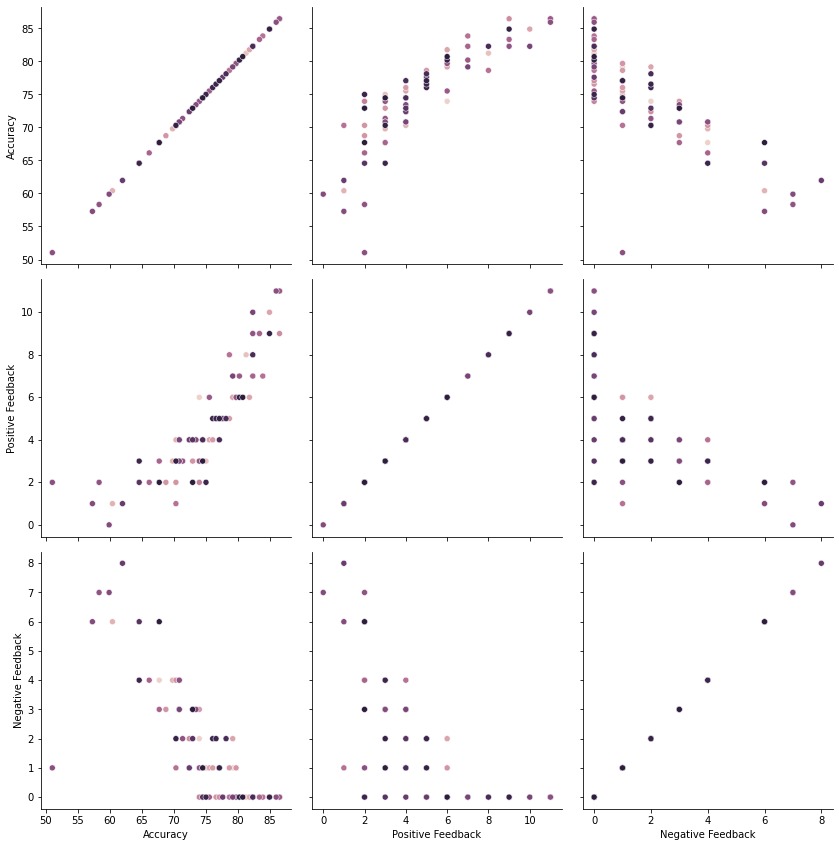

In [31]:
g = sns.PairGrid(rdk_acc_posneg_df, hue='Participant', height=4)
g.map(sns.scatterplot)

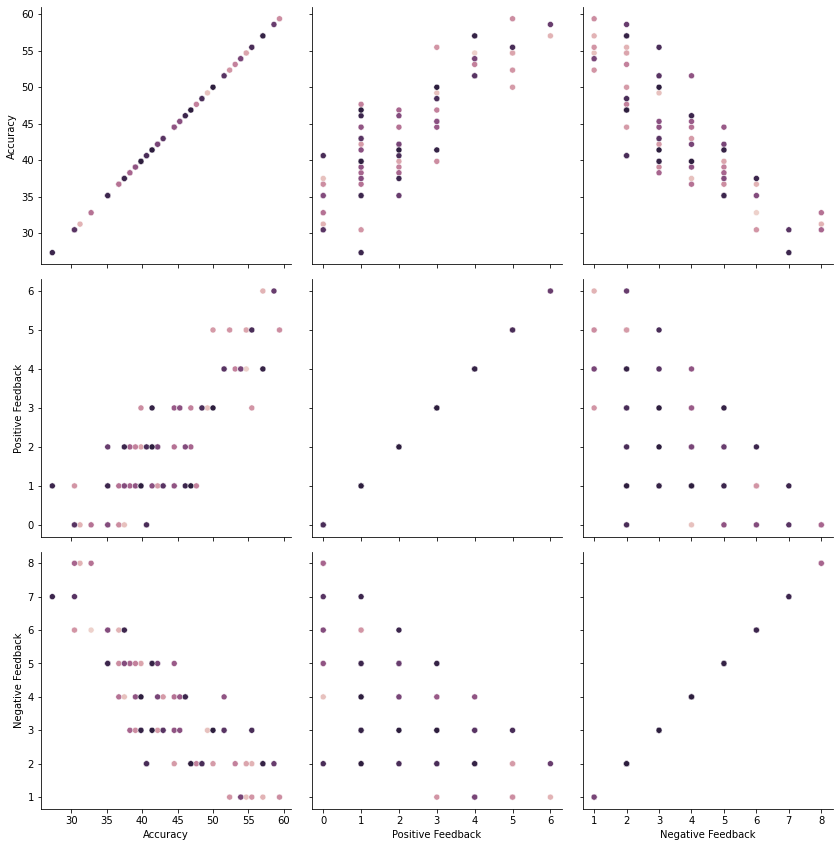

In [32]:
g = sns.PairGrid(bandit_acc_posneg_df, hue='Participant', height=4)
g.map(sns.scatterplot)

### III. NUMBER OF PEOPLE QUALIFYING BONUS CRITERIA PER TASK

In [33]:
def potential_bonus_calculator(df, arr, bonus_threshold):
    
    potential_bonus_df = pd.DataFrame(columns=['Task', 'Bonus Awarded', 'Bonus Not Awarded'])
    bonus = []
    task_arr = []
    
    for manip in arr:
        focus_df = df[df['Tree Node Key'] == task_dict[manip]]
        participants = pd.unique(focus_df['Participant Private ID'])
        bonus_awardees = 0

        for participant in participants:
            participant_df = focus_df[focus_df['Participant Private ID'] == participant]
            participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Attempt', 'Correct', 'Incorrect']]

            # for timeouts
            participant_df['Attempt'].fillna(0, inplace = True)

            accuracy = participant_df['Correct'].sum() / len(participant_df)
            if accuracy >= bonus_threshold:
                bonus_awardees += 1
        
        bonus_non_awardees = participants.size - bonus_awardees
        potential_bonus_df = potential_bonus_df.append({
            'Task': manip, 
            'Bonus Awarded': bonus_awardees, 
            'Bonus Not Awarded': bonus_non_awardees
        }, ignore_index=True)
    
    return potential_bonus_df

44.13919413919414


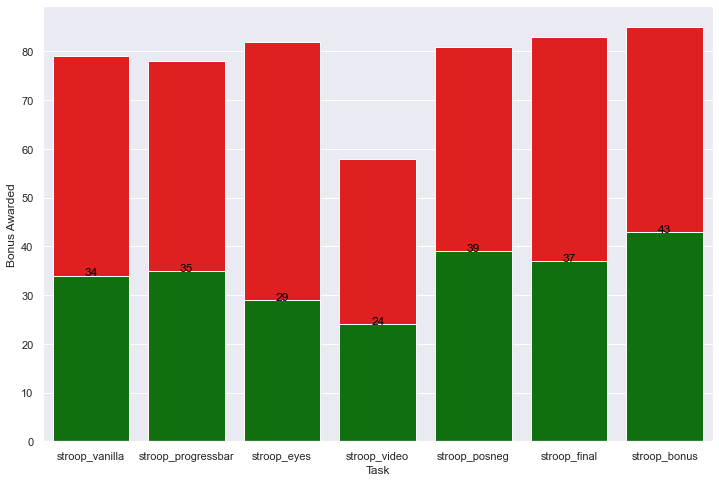

In [34]:
bonus_stroop = 0.96875
stroop_potential_bonus_df = potential_bonus_calculator(stroop_df, stroop_arr, bonus_stroop)

plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
stroop_potential_bonus_df["Sum"] = stroop_potential_bonus_df["Bonus Awarded"] + stroop_potential_bonus_df["Bonus Not Awarded"]
# stroop_potential_bonus_df["Percentage"] = stroop_potential_bonus_df["Bonus Awarded"] * 100 / stroop_potential_bonus_df["Sum"]
g = sns.barplot(data=stroop_potential_bonus_df, x='Task', y='Sum', color='red')
bar2 = sns.barplot(data=stroop_potential_bonus_df, x='Task', y='Bonus Awarded', color='green')
for index, row in stroop_potential_bonus_df.iterrows():
    g.text(row.name, row["Bonus Awarded"], round(row["Bonus Awarded"], 2), color='black', ha="center")
print(stroop_potential_bonus_df["Bonus Awarded"].sum() * 100 / stroop_potential_bonus_df["Sum"].sum())

42.20183486238532


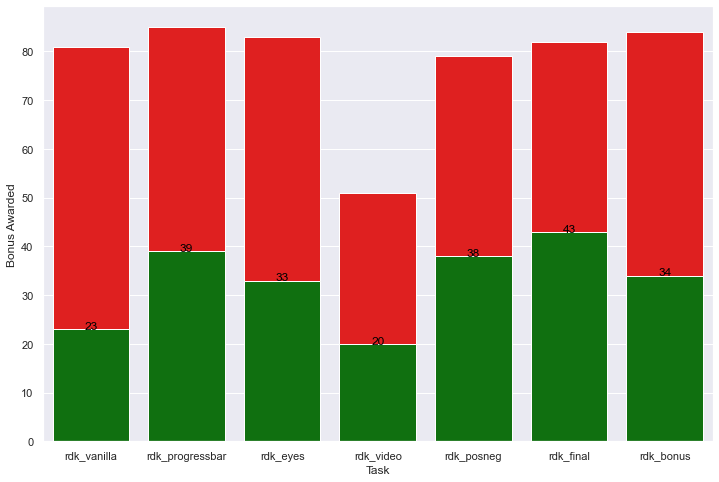

In [35]:
bonus_rdk = 0.75005
rdk_potential_bonus_df = potential_bonus_calculator(rdk_df, rdk_arr, bonus_rdk)

plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
rdk_potential_bonus_df["Sum"] = rdk_potential_bonus_df["Bonus Awarded"] + rdk_potential_bonus_df["Bonus Not Awarded"]
g = sns.barplot(data=rdk_potential_bonus_df, x='Task', y='Sum', color='red')
bar2 = sns.barplot(data=rdk_potential_bonus_df, x='Task', y='Bonus Awarded', color='green')
for index, row in rdk_potential_bonus_df.iterrows():
    g.text(row.name, row["Bonus Awarded"], round(row["Bonus Awarded"], 2), color='black', ha="center")
print(rdk_potential_bonus_df["Bonus Awarded"].sum() * 100 / rdk_potential_bonus_df["Sum"].sum())

49.90892531876138


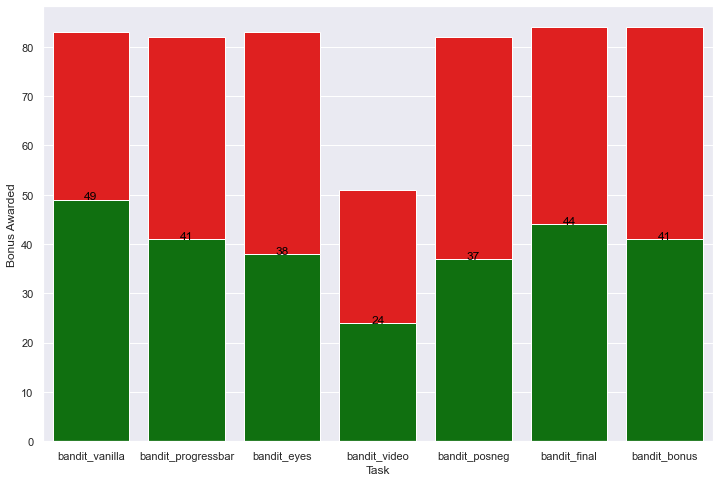

In [36]:
bonus_bandit = 0.43750
bandit_potential_bonus_df = potential_bonus_calculator(bandit_df, bandit_arr, bonus_bandit)

plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
bandit_potential_bonus_df["Sum"] = bandit_potential_bonus_df["Bonus Awarded"] + bandit_potential_bonus_df["Bonus Not Awarded"]
g = sns.barplot(data=bandit_potential_bonus_df, x='Task', y='Sum', color='red')
bar2 = sns.barplot(data=bandit_potential_bonus_df, x='Task', y='Bonus Awarded', color='green')
for index, row in bandit_potential_bonus_df.iterrows():
    g.text(row.name, row["Bonus Awarded"], round(row["Bonus Awarded"], 2), color='black', ha="center")
print(bandit_potential_bonus_df["Bonus Awarded"].sum() * 100 / bandit_potential_bonus_df["Sum"].sum())

##### IV. SIMULATOR FOR DIFFERENT THRESHOLDS FOR POSNEG FEEDBACK

In [37]:
def get_posneg_df(df, arr):
    
    final_list = []
    manip = [m for m in arr if 'posneg' in m][0]
    focus_df = df[df['Tree Node Key'] == task_dict[manip]]
    participants = pd.unique(focus_df['Participant Private ID'])
    
    for participant in participants:
        participant_df = focus_df[focus_df['Participant Private ID'] == participant]
        participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Participant Private ID', 'Attempt', 'Correct', 'Incorrect']]
        participant_df["Participant Private ID"].astype(str)
        # for timeouts
        participant_df['Attempt'].fillna(0, inplace = True)
        final_list.append(participant_df)
    
    return pd.concat(final_list)

In [38]:
def results_per_participant_posneg(focus_df):
    
    results_posneg_df = pd.DataFrame(columns=['Participant', 'Accuracy'])
    participants = pd.unique(focus_df['Participant Private ID'])
    
    for participant in participants:
        participant_df = focus_df[focus_df['Participant Private ID'] == participant]
        first_index = 0
        
        for i in range(len(participant_df) // 16):
            block_df = participant_df[first_index:first_index+16]
            accuracy = block_df['Correct'].sum() / len(block_df)
            results_posneg_df = results_posneg_df.append({
                'Participant': participant,
                'Accuracy': accuracy
            }, ignore_index=True)
            first_index += 16
    
    return results_posneg_df

In [39]:
# stroop
stroop_posneg_df = get_posneg_df(stroop_df, stroop_arr)
stroop_results_posneg_df = results_per_participant_posneg(stroop_posneg_df)

# rdk
rdk_posneg_df = get_posneg_df(rdk_df, rdk_arr)
rdk_results_posneg_df = results_per_participant_posneg(rdk_posneg_df)

#bandit
bandit_posneg_df = get_posneg_df(bandit_df, bandit_arr)
bandit_results_posneg_df = results_per_participant_posneg(bandit_posneg_df)

print(bandit_results_posneg_df["Accuracy"].value_counts())

0.4375    117
0.3750    106
0.3125     85
0.5000     66
0.5625     60
0.2500     55
0.6250     39
0.1875     35
0.6875     31
0.7500     24
0.1250     17
0.8750     10
0.8125      8
0.0625      3
Name: Accuracy, dtype: int64


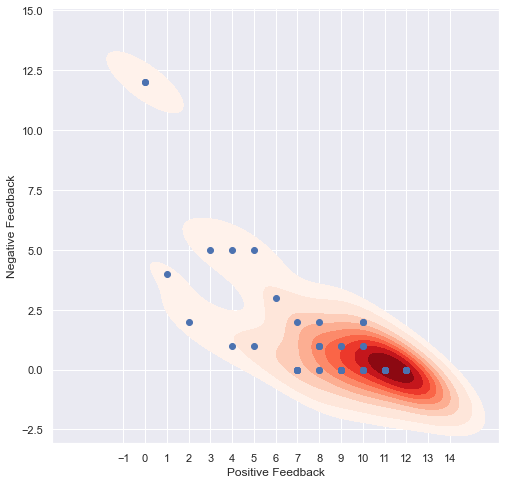

Average positive feedback messages per participant: 9.37037037037037
Average negative feedback messages per participant: 0.8024691358024691


In [40]:
from matplotlib.widgets import Slider

def f(df, pos_threshold, neg_threshold):
    new_df = df
    new_df['pos'] = 0
    new_df['neg'] = 0
    new_df['pos'].values[new_df['Accuracy'].values >= pos_threshold] = 1
    new_df['neg'].values[new_df['Accuracy'].values <= neg_threshold] = 1
    return new_df.groupby('Participant').agg({'pos': 'sum', 'neg': 'sum'}).reset_index()

stroop_new_posneg_counts = f(stroop_results_posneg_df, 15/16, 12/16)
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(data = stroop_new_posneg_counts, x="pos", y="neg", cmap="Reds", shade=True)
plot = ax.scatter(stroop_new_posneg_counts["pos"], stroop_new_posneg_counts["neg"])
ax.set_xticks(np.arange(-1, 15, 1))
ax.set_xlabel('Positive Feedback')
ax.set_ylabel('Negative Feedback')
plt.show()

print("Average positive feedback messages per participant: " + str(stroop_new_posneg_counts["pos"].mean()))
print("Average negative feedback messages per participant: " + str(stroop_new_posneg_counts["neg"].mean()))


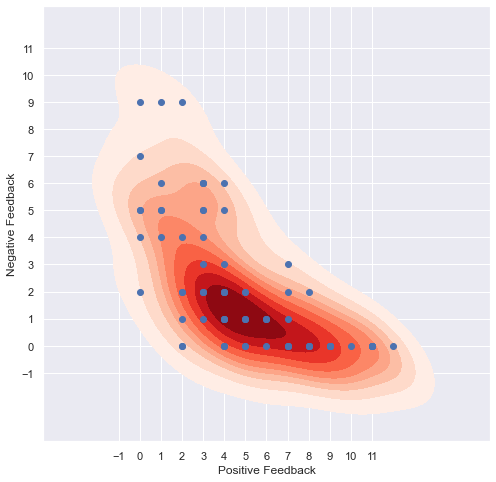

Average positive feedback messages per participant: 4.89873417721519
Average negative feedback messages per participant: 2.088607594936709


In [41]:
rdk_new_posneg_counts = f(rdk_results_posneg_df, 13/16, 10/16)
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(data = rdk_new_posneg_counts, x="pos", y="neg", cmap="Reds", shade=True)
plot = ax.scatter(rdk_new_posneg_counts["pos"], rdk_new_posneg_counts["neg"])
ax.set_xticks(np.arange(-1, 12, 1))
ax.set_yticks(np.arange(-1, 12, 1))
ax.set_xlabel('Positive Feedback')
ax.set_ylabel('Negative Feedback')
plt.show()
print("Average positive feedback messages per participant: " + str(rdk_new_posneg_counts["pos"].mean()))
print("Average negative feedback messages per participant: " + str(rdk_new_posneg_counts["neg"].mean()))


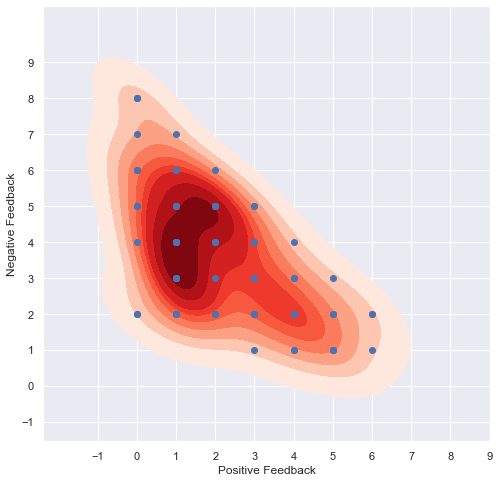

Average positive feedback messages per participant: 2.097560975609756
Average negative feedback messages per participant: 3.6707317073170733


In [42]:
bandit_new_posneg_counts = f(bandit_results_posneg_df, 9/16, 6/16)
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(data = bandit_new_posneg_counts, x="pos", y="neg", cmap="Reds", shade=True)
plot = ax.scatter(bandit_new_posneg_counts["pos"], bandit_new_posneg_counts["neg"])
ax.set_xticks(np.arange(-1, 10, 1))
ax.set_yticks(np.arange(-1, 10, 1))
ax.set_xlabel('Positive Feedback')
ax.set_ylabel('Negative Feedback')
plt.show()
print("Average positive feedback messages per participant: " + str(bandit_new_posneg_counts["pos"].mean()))
print("Average negative feedback messages per participant: " + str(bandit_new_posneg_counts["neg"].mean()))

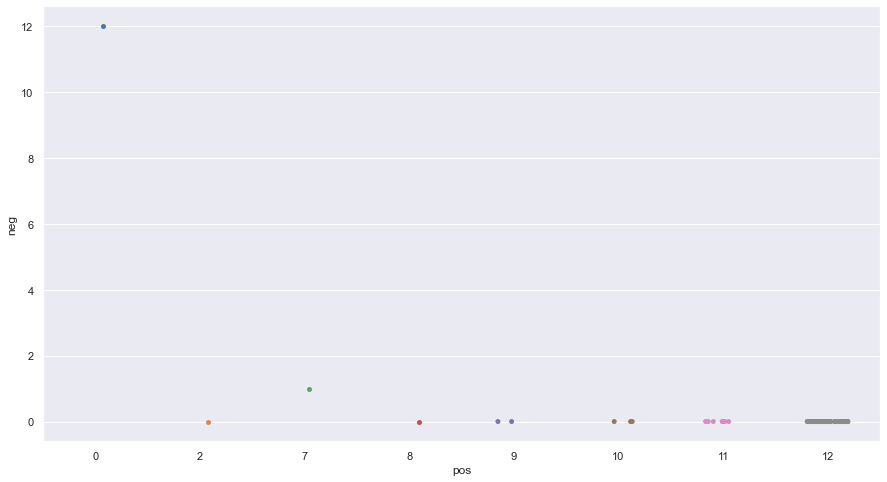

In [43]:
stroop_pos_threshold = 0.75
stroop_neg_threshold = 0.35

fig = plt.figure(figsize=(15,8))
stroop_new_posneg_counts = f(stroop_results_posneg_df, stroop_pos_threshold, stroop_neg_threshold)
plot = sns.stripplot(data=stroop_new_posneg_counts, x = 'pos', y='neg', jitter=0.2)

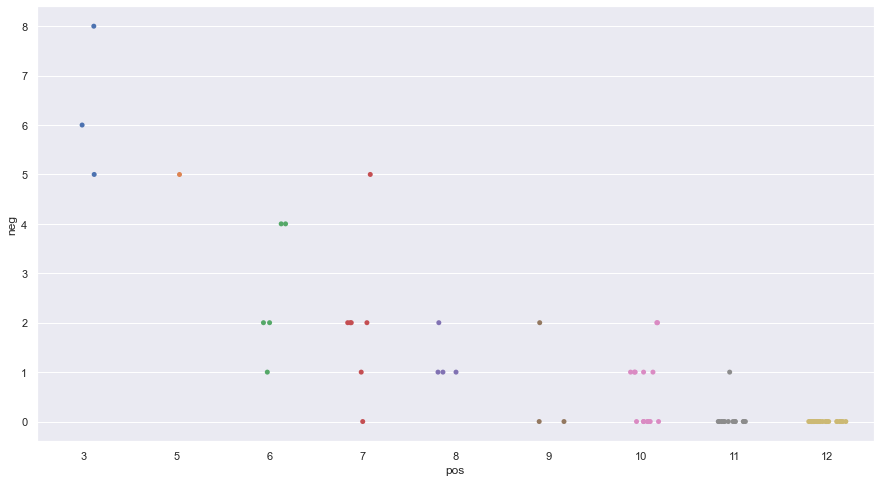

In [44]:
rdk_pos_threshold = 0.65
rdk_neg_threshold = 0.6

fig = plt.figure(figsize=(15,8))
rdk_new_posneg_counts = f(rdk_results_posneg_df, rdk_pos_threshold, rdk_neg_threshold)
plot = sns.stripplot(data=rdk_new_posneg_counts, x = 'pos', y='neg', jitter=0.2)

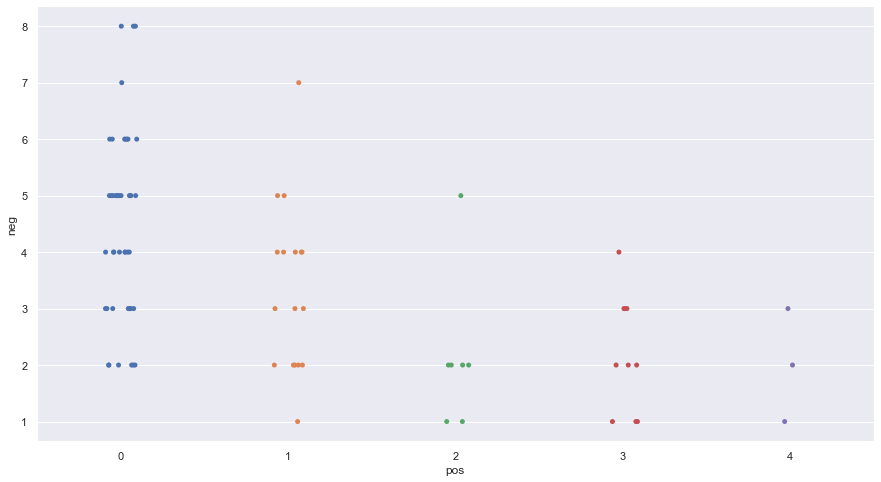

In [45]:
bandit_pos_threshold = 0.65
bandit_neg_threshold = 0.4

fig = plt.figure(figsize=(15,8))
bandit_new_posneg_counts = f(bandit_results_posneg_df, bandit_pos_threshold, bandit_neg_threshold)
plot = sns.stripplot(data=bandit_new_posneg_counts, x = 'pos', y='neg')

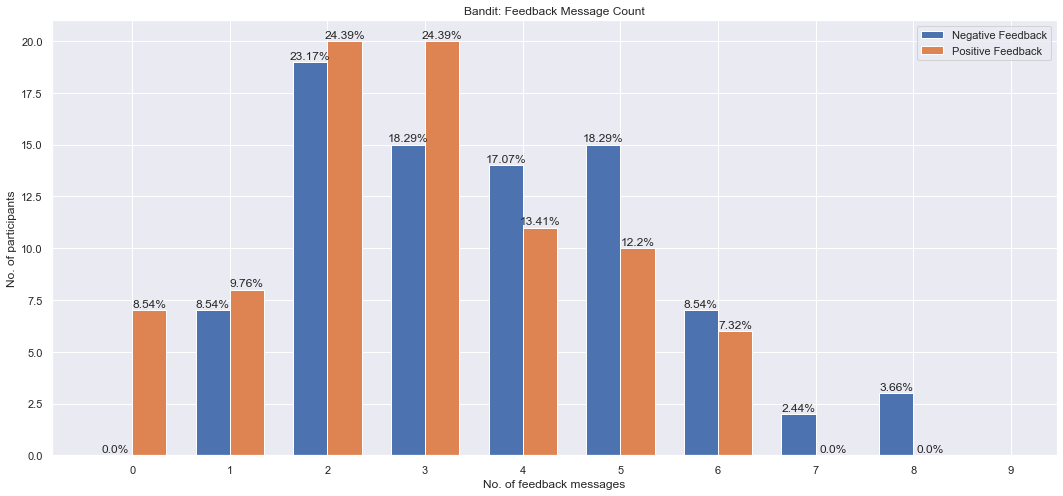

In [46]:
bandit_pos_threshold = 0.5
bandit_neg_threshold = 0.4
bandit_new_posneg_counts = f(bandit_results_posneg_df, bandit_pos_threshold, bandit_neg_threshold)

fig, ax = plt.subplots(figsize=(18,8))
participants = len(bandit_new_posneg_counts)
lower = ax.hist(bandit_new_posneg_counts["neg"], bins=np.arange(0, 10)-0.35, label='Negative Feedback', width=width)
upper = ax.hist(bandit_new_posneg_counts["pos"], bins=np.arange(0, 10), label='Positive Feedback', width=width)
ax.set_title('Bandit: Feedback Message Count')
ax.set_xticks(np.arange(0, 10))
ax.set_ylabel('No. of participants')
ax.set_xlabel('No. of feedback messages')

for rect1 in ax.patches:
    height = rect1.get_height()
    plt.annotate( "{}%".format(round(height*100/participants, 2)),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=12)
ax.legend()
plt.show()

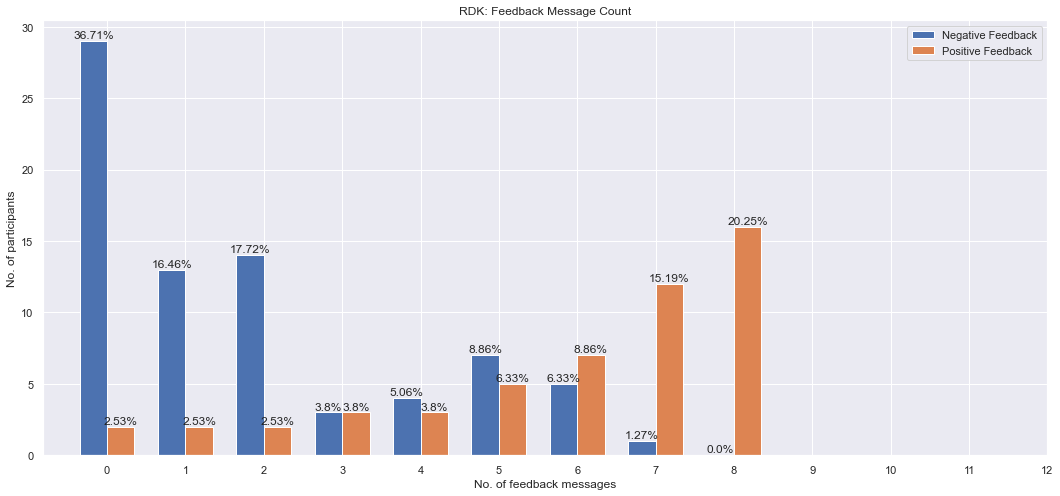

In [47]:
rdk_pos_threshold = 0.75
rdk_neg_threshold = 0.65
rdk_new_posneg_counts = f(rdk_results_posneg_df, rdk_pos_threshold, rdk_neg_threshold)

fig, ax = plt.subplots(figsize=(18,8))
participants = len(rdk_new_posneg_counts)
lower = ax.hist(rdk_new_posneg_counts["neg"], bins=np.arange(0, 10)-0.35, label='Negative Feedback', width=width)
upper = ax.hist(rdk_new_posneg_counts["pos"], bins=np.arange(0, 10), label='Positive Feedback', width=width)
ax.set_title('RDK: Feedback Message Count')
ax.set_xticks(np.arange(0, 13))
ax.set_ylabel('No. of participants')
ax.set_xlabel('No. of feedback messages')

for rect1 in ax.patches:
    height = rect1.get_height()
    plt.annotate( "{}%".format(round(height*100/participants, 2)),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=12)
ax.legend()
plt.show()

[11  7 12  8  9 10  4  5  2  0  6  3  1]


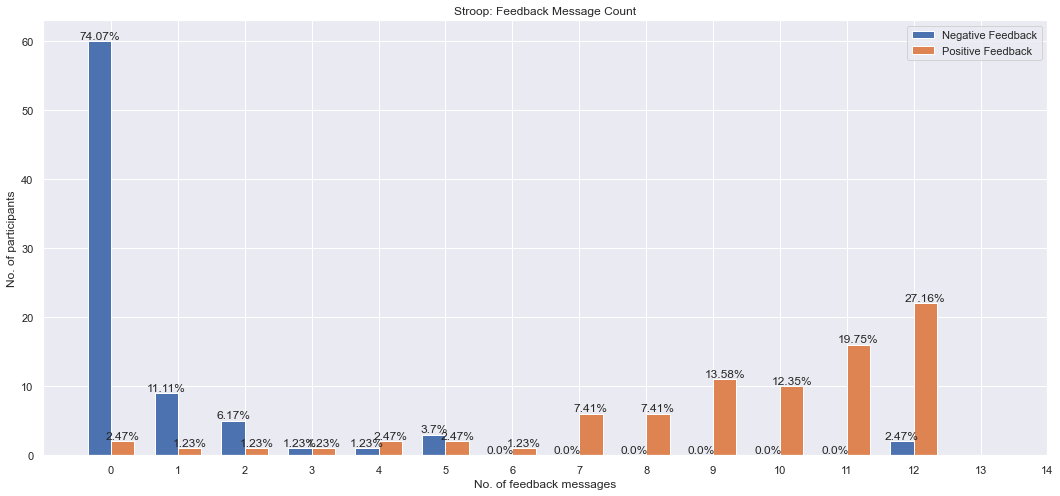

In [48]:
stroop_pos_threshold = 0.90
stroop_neg_threshold = 0.8
stroop_new_posneg_counts = f(stroop_results_posneg_df, stroop_pos_threshold, stroop_neg_threshold)
print(stroop_new_posneg_counts["pos"].unique())
fig, ax = plt.subplots(figsize=(18,8))
participants = len(stroop_new_posneg_counts)
lower = ax.hist(stroop_new_posneg_counts["neg"], bins=np.arange(0, 14)-0.35, label='Negative Feedback', width=width)
upper = ax.hist(stroop_new_posneg_counts["pos"], bins=np.arange(0, 14), label='Positive Feedback', width=width)
ax.set_title('Stroop: Feedback Message Count')
ax.set_xticks(np.arange(0, 15))
ax.set_ylabel('No. of participants')
ax.set_xlabel('No. of feedback messages')

for rect1 in ax.patches:
    height = rect1.get_height()
    plt.annotate( "{}%".format(round(height*100/participants, 2)),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=12)
ax.legend()
plt.show()